In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
# Converting 'Chance of Admit' into binary classification
df['Admitted'] = (df['Chance of Admit '] >= 0.5).astype(int)

# Selecting features and target variable
X = df[["GRE Score", "CGPA"]]  # Academic performance indicators
y = df["Admitted"]  # Target variable

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.92
Confusion Matrix:
 [[ 4  5]
 [ 3 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.95      0.97      0.96        91

    accuracy                           0.92       100
   macro avg       0.76      0.71      0.73       100
weighted avg       0.91      0.92      0.92       100



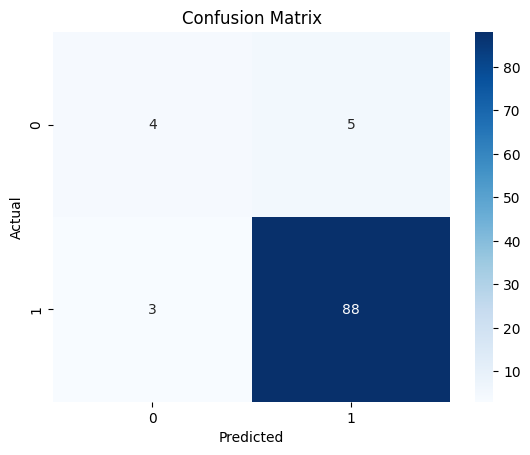

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

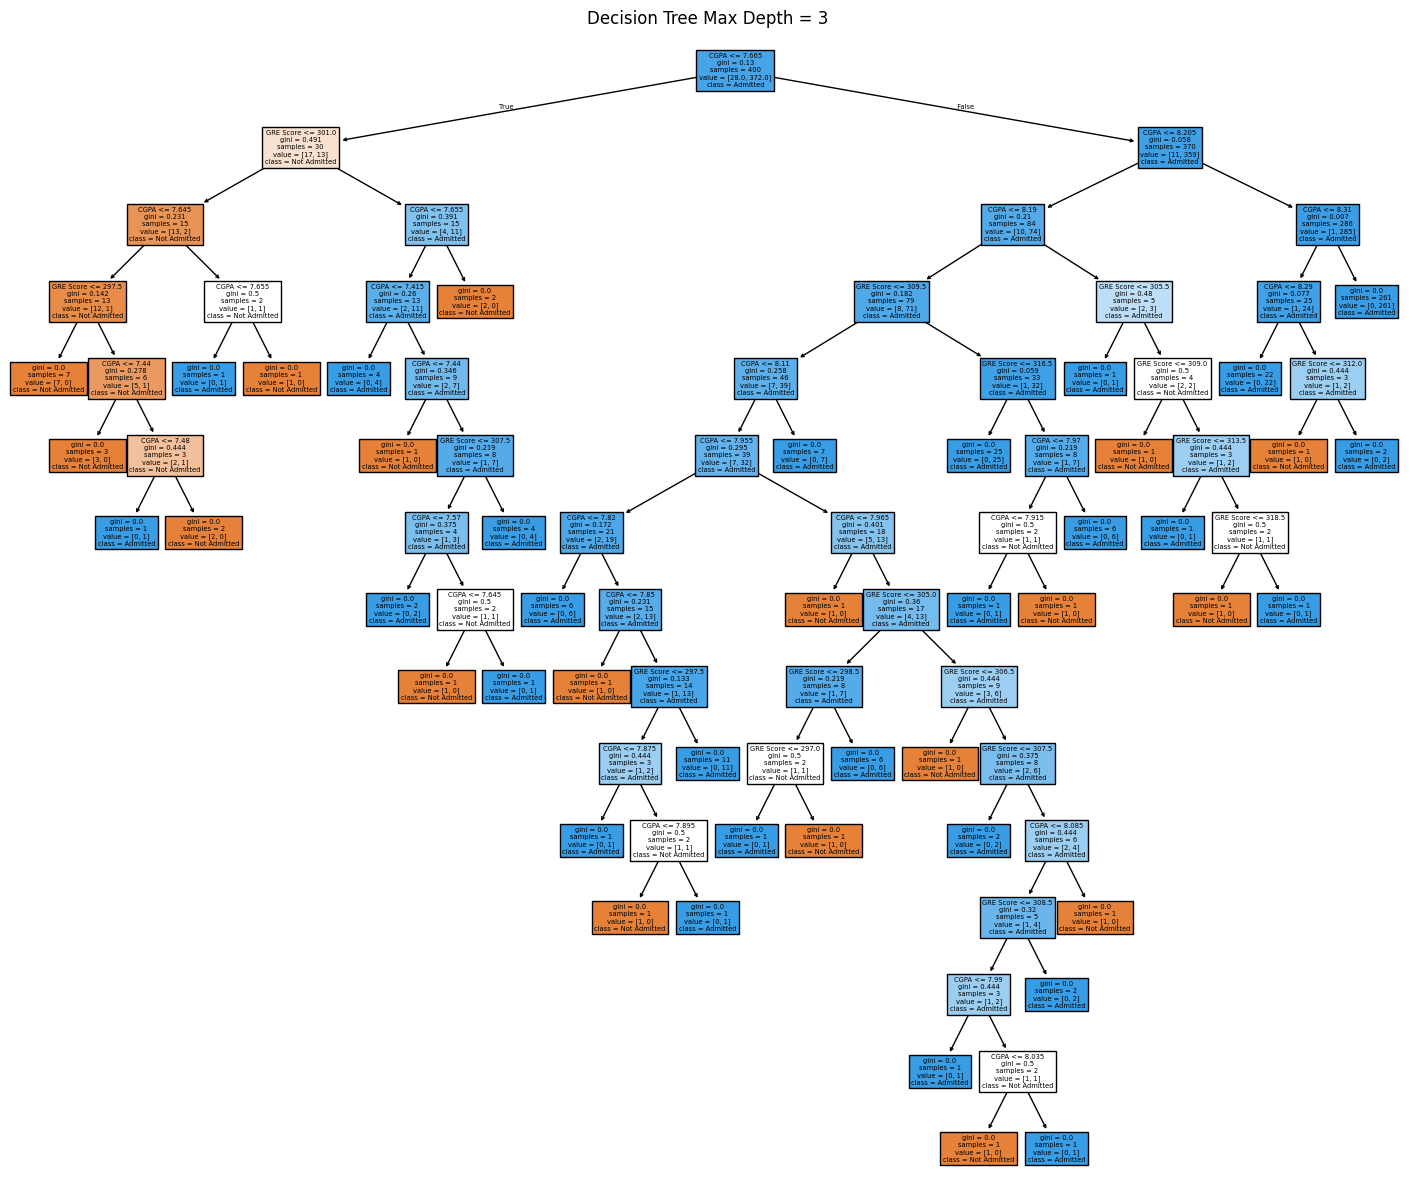

In [9]:
plt.figure(figsize=(18, 15))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Admitted', 'Admitted'])
plt.title("Decision Tree Max Depth = 3")
plt.show()